In [1]:
from lib import *
from simulator import *



Using TensorFlow backend.


In [2]:
# Lista de hiperparâmetros que serão testados
def config_model(n_exog=[4], n_steps=[8], n_train_steps=[24], n_features=[5],
                 n_nodes=[150, 300], n_epochs=[100], n_batch=[128]):
    """


    Parameters
    ----------
    n_exog : list, optional
        Número de variáveis exógenas do modelo. The default is [4].
    n_steps : list, optional
        Número de intervalos de tempo anteriores para a previsão. The default is [8].
    n_train_steps : list, optional
        Número de intervalos de tempo para treino da rede neural. The default is [24].
    n_features : list, optional
        Número total de variáveis exógenas e endógenas. The default is [5].
    n_nodes : list, optional
        Número de neurônios da rede neural. The default is [150,300].
    n_epochs : list, optional
        Número máximo de épocas de treinamento. The default is [100].
    n_batch : list, optional
        Número total de batches da rede neural. The default is [128].

    Returns
    -------
    configs: list
    Lista de parâmetros para a simulação individual o para realização
    de grid search

    """

    # forma de inserção manual dos dados: [[5],[8],[24],[5],[150,300],[50,100],[72]]
    configs = list()
    for i in n_exog:
        for j in n_steps:
            for k in n_train_steps:
                for l in n_features:
                    for m in n_nodes:
                        for n in n_epochs:
                            for o in n_batch:
                                cfg = [i, j, k, l, m, n, o]
                                configs.append(cfg)
    print('\nTotal de Combinações de Hiperparâmetros: %d' % len(configs))
    return configs


def run_lstm(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 300, 300, 32]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[300], n_batch=[32])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return


def run_lstm_bidirecccional(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM-Bidirecional.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 300, 300, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[300], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM-B')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return


def run_lstm_stacked(data):
    """
    Função que executa a simulação com a arquitetura de rede LSTM empilhado.

    Returns
    -------
    None.

    """
    #[4, 36, 36, 5, 100, 300, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[100], n_epochs=[300], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('LSTM-S')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return


def run_gru(data):
    """
    Função que executa a simulação com a arquitetura de rede GRU.

    Returns
    -------
    None.

    """
    # [4, 36, 36, 5, 100, 150, 36]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[100], n_epochs=[150], n_batch=[36])

    simulator = Simulator(data, config)
    simulator.set_model_arch('GRU')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return


@tf.autograph.experimental.do_not_convert
def run_cnnn_lstm(data):
    """
    Função que executa a simulação com a arquitetura de rede CNN-LSTM.

    Returns
    -------
    None.

    """
    #[4, 36, 36, 5, 300, 250, 12]
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[250], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.set_model_arch('CNN-LSTM')
    best_res, best_par = simulator.run_simulation()

    # Carrega o modelo que apresentou o melhor resultado na simulação
    best_model, best_res, n_inputs = simulator.load_best_model()

    df_proj, pred_list = simulator.forecast(data, n_inputs, 24, best_model)

    model_name = 'Inv_{}'.format(simulator.get_model_arch())

    # Cria Data Frame a partir da melhor previsão dentro da amostra
    df_NN = pd.DataFrame(best_res, columns=[model_name])
    df_NN.index = data.index[-len(df_NN):]

    # Cria Data Frame com todos os resultados
    df_proj = pd.concat([df_proj, df_NN], axis=1)

    plot_results(df_proj, model_name)

    return


In [3]:


def plot_results(data, model_name):
    """
     Função para visualização da série original, previsão do modelo dentro da amostra
     e previsão do modelo fora da amostra

    Parameters
    ----------
    data : TYPE
        DESCRIPTION.
    model_name : TYPE
        DESCRIPTION.

    Returns
    -------
    None.

    """

    plt.figure()
    plt.plot(data.index, data['Inv'],
             label='Valores Observados')
    plt.plot(data.index, data[str(model_name)],
             label='Rede Neural - dentro da amostra', color='black')
    plt.plot(data.index, data['Prediction'],
             label='Rede Neural - fora da amostra', color='blue')

    plt.title('Previsões com Modelo de Redes Neurais Recorrentes')
    plt.xlabel('Ano')
    plt.ylabel('Investimento (%PIB)')
    plt.legend()
    plt.savefig('{}/forecast-{}'.format(FIGS_FLD, model_name))
    plt.show()


def run_neuralVAR(data):
    config = config_model(n_steps=[36], n_train_steps=[36],
                          n_nodes=[300], n_epochs=[250], n_batch=[12])

    simulator = Simulator(data, config)
    simulator.neural_VAR(max_var_order=6)


def run_ARIMA(data):

    config = []

    simulator = Simulator(data, config)
    arima_result = simulator.ARIMA()

    n_ahead = 36

    dates_forecast = pd.date_range(start=data.index[-1], periods=n_ahead + 1, freq='M')
    forecast = pd.DataFrame(arima_result.predict(n_ahead), index=dates_forecast[1:], columns=['Predictions'])

    predictions = pd.concat([data['Inv'], forecast], axis=0)
    predictions.columns = ['Inv', 'Predictions']

    plt.figure()
    plt.plot(predictions.index[-n_ahead:], predictions['Predictions'][-n_ahead:])
    plt.plot(predictions.index[:-n_ahead], predictions['Inv'][:-n_ahead])
    plt.title('Previsões com Modelo ARIMA')
    plt.xlabel('Ano')
    plt.ylabel('Investimento (%PIB)')
    plt.legend()
    plt.savefig('{}/forecast-{}'.format(FIGS_FLD, 'ARIMA'))
    plt.show()


def synthetic_forecast(data, n_artificial=12):

    #data = load_data()
    #data = data[['Inv','Agr','Ind','Inf','Com'] ]
    data_obs = data.iloc[-n_artificial:, :]

    config = config_model(n_steps=[36], n_train_steps=[24],
                          n_nodes=[300], n_epochs=[300], n_batch=[32])

    cols = []
    for i in data.columns:
        cols.append(i + '-Inv')

    cols.insert(0, 'Inv')

    artificial_in = data['Inv']
    for i in range(data_obs.shape[1]):
        data_new = data.iloc[:-n_artificial, :]
        data_artificial = np.zeros((n_artificial, 5), dtype='float')
        data_artificial[0, i] = 1

        simulator = Simulator(data_new, config)
        simulator.set_model_arch('LSTM')
        simulator.set_nrep(1)
        simulator.set_wrt_model(False)

        data_artificial = pd.DataFrame(data_artificial, columns=data.columns)
        data_artificial.index = data_obs.index

        data_new = pd.concat((data_new, data_artificial), axis=0)

        result_mean, perf_mean, cfg = simulator.eval_model(config[0])

        artificial_index = config[0][1] + config[0][2] + n_artificial
        pred = pd.DataFrame(result_mean, index=data.index[artificial_index:])
        artificial_in = pd.concat([artificial_in, pred], axis=1)

    artificial_in.columns = cols
    artificial_out = data
    dates_forecast = pd.date_range(start=data.index[-1], periods=2, freq='M')
    forecast = pd.DataFrame(np.zeros((1, 5)), index=dates_forecast[1:], columns=data.columns)
    data_new = pd.concat([data, forecast], axis=0)
    predictions = pd.DataFrame()
    # [4, 36, 36, 5, 300, 300, 32]
    for i in range(artificial_out.shape[1]):
        data_new.iloc[-1][i] = 1
        simulator = Simulator(data_new, config)
        simulator.set_model_arch('LSTM')
        simulator.set_nrep(1)
        simulator.set_wrt_model(False)

        # Carrega o modelo que apresentou o melhor resultado na simulação
        best_model, best_res, n_inputs = simulator.load_best_model()
        df_proj, pred_list = simulator.forecast(data_new, n_inputs, n_artificial, best_model)
        pred = df_proj['Prediction']
        predictions = pd.concat([predictions, pred], axis=1)
        data_new.iloc[-1][i] = 0.

    predictions.iloc[-(n_artificial + 1)] = np.ones(5)
    predictions.columns = cols[1:]
    artificial_out = pd.concat([data_new, pd.DataFrame(best_res,
                                                       index=data.index[-len(best_res):], columns=['Pred-LSTM']),
                                predictions], axis=1)

    with open('{}/{}-steps_insample_pred.pkl'.format(PKL_FLD, n_artificial), 'wb') as fp:
        pickle.dump(artificial_in, fp)
    with open('{}/{}-steps_outsample_par.pkl'.format(PKL_FLD, n_artificial), 'wb') as fp:
        pickle.dump(artificial_out, fp)


matplotlib                                 3.2.2
IPython.core.release                       7.16.1
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf
pandas                                     1.0.5
pmdarima                                   1.6.1
statsmodels.api                            0.11.1
numpy                                      1.18.5
logging                                    0.5.1.2
tensorflow                                 2.1.0
Carlos Eduardo Veras Neves
**************************************************
--- Início da Simulação: ---
**************************************************
       Agropecuária  Indústria  Infraestrutura  Comércio e serviços  \
count     72.000000  72.000000       72.000000            72.000000   
mean       0.135622   0.565348        0.495093             0.219978   
std        0.065522   0.458333        0.270936             0.153548   
min        0.053407   0.028426        0.085215             0.022447   
25%        0.091239   0.265550        

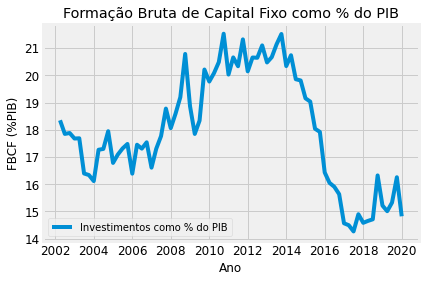

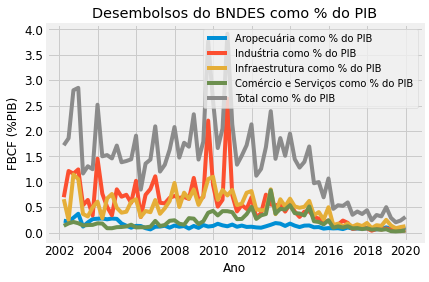

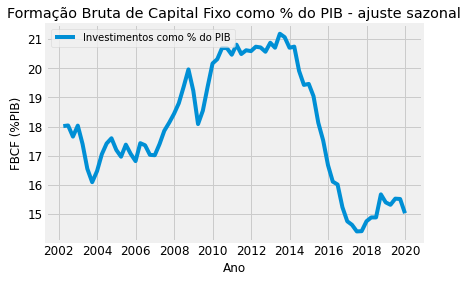

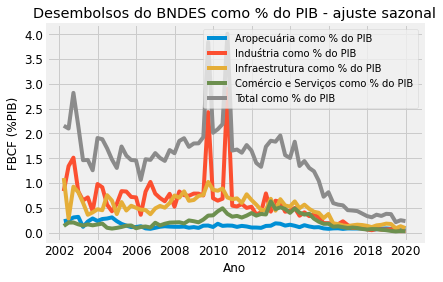

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

##################################################
# Matriz de Correlação #
          Agr       Ind       Inf       Com       Tot       Inv
Agr  1.000000  0.434997  0.470210  0.120841  0.532269  0.193207
Ind  0.434997  1.000000  0.684401  0.309378  0.915265  0.427234
Inf  0.470210  0.684401  1.000000  0.577190  0.890311  0.742500
Com  0.120841  0.309378  0.577190  1.000000  0.585665  0.907597
Tot  0.532269  0.915265  0.890311  0.585665  1.000000  0.698271
Inv  0.193207  0.427234  0.742500  0.907597  0.698271  1.000000
##################################################

Total de Combinações de Hiperparâmetros: 1
[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,24-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/15-23:16:

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


MSE:1.38-RMSE:1.17-MAPE:1.38

[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,24-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/15-23:16:49



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


MSE:0.98-RMSE:0.99-MAPE:0.98

[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,24-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/15-23:17:02



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


MSE:1.35-RMSE:1.16-MAPE:1.35

[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,24-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/15-23:17:16



  0%|                                                                                            | 0/1 [00:00<?, ?it/s]


MSE:1.56-RMSE:1.25-MAPE:1.56

[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
##################################################
 --- Avaliando do Modelo : ---
##################################################


######################################################################
## Parâmetros: 
4-n_endog,36-n_steps,24-n_train_steps,5-n_features
300-n_nodes,300-n_epochs,32-n_batch
 ## 
2020/07/15-23:17:30



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:12<00:00, 12.65s/it]


MSE:0.97-RMSE:0.98-MAPE:0.97

[[  4]
 [ 36]
 [ 24]
 [  5]
 [300]
 [300]
 [ 32]]
[4, 36, 36, 5, 300, 300, 32]


##################################################
# Melhor Modelo :
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 300)               367200    
_________________________________________________________________
dropout_18 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 201       
Total params: 427,601
Trainable params: 427,601
Non-trainable params: 0
_________________________________________________________________
#############################################

In [4]:


def main():
    """
    Função principal para execução do código.

    Returns
    -------
    None.

    """
    # abre arquivo para gravar a saída da simulação em arquivo
    #sys.stdout = open('{}/{}-app.log'.format(LOGS_FLD,datetime.now().strftime("%Y%m%d-%H%M%S")), 'w')
    logging.basicConfig(filename='{}/{}-app.log'.format(LOGS_FLD, datetime.now().strftime("%Y%m%d-%H%M%S")),
                        level=logging.INFO)
    logging.info('## Início do log ##')
    # Versões dos pacotes usados neste código
    get_ipython().run_line_magic('reload_ext', 'watermark')
    get_ipython().run_line_magic('watermark', '-a "Carlos Eduardo Veras Neves" --iversions')

    # Prepara diretórios para armazenar arquivos gerados pela simulação
    makedirs(MODELS_FLD)
    makedirs(FIGS_FLD)
    makedirs(LOGS_FLD)
    makedirs(PKL_FLD)

    print("**" * 25)
    print('--- Início da Simulação: ---')
    print("**" * 25)

    df = load_data()
    var = ['Inv', 'Agr', 'Ind', 'Inf', 'Com']

    df = df[var]
    # run_lstm(df)
    # run_lstm_bidirecccional(df)
    # run_lstm_stacked(df)
    # run_gru(df)
    # run_cnnn_lstm(df)

    # run_neuralVAR(df)
    # run_ARIMA(df)
    synthetic_forecast(df)

    print("**" * 25)
    print('-- Fim da Simulação: --')
    print("**" * 25)

    logging.info('## Fim do log ##')

    # sys.stdout.close()


if __name__ == '__main__':
    main()
